In [22]:
# Regular Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [23]:
# Getting the data from github repo: https://github.com/jldbc/coffee-quality-database
df = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


### Pass Through of Data

In [24]:
# Let's learn more about the size and structure of our dataset.
num_rows = len(df)
num_columns = len(df.columns)
print("Number of rows:", num_rows, "\nNumber of columns:", num_columns)

Number of rows: 1311 
Number of columns: 43


In [25]:
# All columns in data
df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [26]:
# Immediately, there are certain columns we can drop which are irrelevant:
drop_cols = ['Species', 'ICO.Number', 'Certification.Address', 'Certification.Contact']
df = df.drop(drop_cols, axis=1)

In [27]:
# Let's now rename all the column names so that they are consistent:
df.columns = df.columns.str.replace('.', '_')
df.columns = df.columns.str.lower()

<ipython-input-27-a0e170944d97>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   owner                 1304 non-null   object 
 1   country_of_origin     1310 non-null   object 
 2   farm_name             955 non-null    object 
 3   lot_number            270 non-null    object 
 4   mill                  1001 non-null   object 
 5   company               1102 non-null   object 
 6   altitude              1088 non-null   object 
 7   region                1254 non-null   object 
 8   producer              1081 non-null   object 
 9   number_of_bags        1311 non-null   int64  
 10  bag_weight            1311 non-null   object 
 11  in_country_partner    1311 non-null   object 
 12  harvest_year          1264 non-null   object 
 13  grading_date          1311 non-null   object 
 14  owner_1               1304 non-null   object 
 15  variety              

In [29]:
# Determine how much data is missing for each remaining variable
(df.isna().sum().sort_values(ascending=False) / len(df) * 100).head(25)

lot_number              79.405034
farm_name               27.154844
mill                    23.646072
producer                17.543860
altitude_mean_meters    17.315027
altitude_high_meters    17.315027
altitude_low_meters     17.315027
altitude                17.009916
color                   16.475973
company                 15.942029
variety                 15.331808
processing_method       11.594203
region                   4.347826
harvest_year             3.585050
owner                    0.533944
owner_1                  0.533944
country_of_origin        0.076278
quakers                  0.076278
moisture                 0.000000
number_of_bags           0.000000
bag_weight               0.000000
unit_of_measurement      0.000000
certification_body       0.000000
expiration               0.000000
category_two_defects     0.000000
dtype: float64

A couple of things we have to do to continue cleaning the data:

1. Convert the dates to `datetime` objects
2. Remove redundant column(s) (`altitude`)
3. Remove column(s) missing several bits of data (`lot_number`)
4. Impute data for columns with missing data (`farm_name`, `mill`, `producer`, etc.)

In [30]:
# Dropping the redundant columns and those with missing data
drop_cols = ['lot_number', 'owner_1']
df = df.drop(drop_cols, axis=1)

In [31]:
# Taking a look at the different date columns
df[['harvest_year', 'grading_date', 'expiration','harvest_year']].head(10)

,harvest_year,grading_date,expiration,harvest_year
0,2014,"April 4th, 2015","April 3rd, 2016",2014
1,2014,"April 4th, 2015","April 3rd, 2016",2014
2,NaN,"May 31st, 2010","May 31st, 2011",NaN
3,2014,"March 26th, 2015","March 25th, 2016",2014
4,2014,"April 4th, 2015","April 3rd, 2016",2014
5,2013,"September 3rd, 2013","September 3rd, 2014",2013
6,2012,"September 17th, 2012","September 17th, 2013",2012
7,March 2010,"September 2nd, 2010","September 2nd, 2011",March 2010
8,March 2010,"September 2nd, 2010","September 2nd, 2011",March 2010
9,2014,"March 30th, 2015","March 29th, 2016",2014


In [32]:
# Converting columns to datetime
df['grading_date'] = pd.to_datetime(df['grading_date'])
df['expiration'] = pd.to_datetime(df['expiration'])

In [33]:
# The final column is a bit tricky since there are some observations that 
# contain ranges
df[df['harvest_year'].str.isalnum() == False]['harvest_year']

7                   March 2010
8                   March 2010
13      Sept 2009 - April 2010
14                  March 2010
16                  May-August
                 ...          
1253               2017 / 2018
1261                08/09 crop
1265                 2011/2012
1273               2017 / 2018
1302               2017 / 2018
Name: harvest_year, Length: 161, dtype: object

In [34]:
# Taking a look at the rows which are missing a harvest year
df[df['harvest_year'].isna()].head()

,owner,country_of_origin,farm_name,mill,company,altitude,region,producer,number_of_bags,bag_weight,...,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,...,0,0.0,NaN,0,2011-05-31,Specialty Coffee Association,m,1600.0,1800.0,1700.0
30,nora zeas,Nicaragua,NaN,beneficio atlantic condega,NaN,NaN,NaN,NaN,275,6,...,0,0.0,NaN,2,2011-05-18,Specialty Coffee Association,m,NaN,NaN,NaN
95,kona pacific farmers cooperative,United States (Hawaii),kona pacific farmers cooperative,kona pacific farmers cooperative,NaN,NaN,kona,NaN,27,0 lbs,...,0,0.0,NaN,0,2011-05-17,Specialty Coffee Association,ft,NaN,NaN,NaN
104,kona pacific farmers cooperative,United States (Hawaii),kona pacific farmers cooperative,NaN,NaN,NaN,kona,NaN,15,100 lbs,...,0,0.0,NaN,1,2012-02-24,Specialty Coffee Association,ft,NaN,NaN,NaN
127,松澤宏樹 koju matsuzawa,Japan,ada farm,ada farm,matsuzawa coffee,170,ada okinawa japan,Taijiro TOKUDA,20,1 kg,...,0,0.0,Green,0,2017-11-02,Specialty Coffee Institute of Asia,m,170.0,170.0,170.0


This column is not as straightforward as I originally thought it'd be to clean. So what I'm thinking of doing is doing the following:

1. Drop the rows w/out a harvest year since they are also missing other features (i.e. altitude, region, etc.)
2. Extract the numbers from the observations that are not in YYYY format
3. Review the extracted numbers and further refine
4. Drop any `NaN`since there's only a few of them

In [35]:
# Step #1. Drop observations without a harvest year
df = df[~df['harvest_year'].isna()]
print(f'There are now {df.shape[0]} records in the datafile.')

There are now 1264 records in the datafile.


In [36]:
# Step #2a. Extract only the numbers from observations not in YYYY format
df['harvest_year_extract'] = df['harvest_year'].str.extract('(\d+)')
df['harvest_year_extract'].value_counts()

2012    352
2014    245
2013    199
2015    153
2016    129
2017     87
2011     32
2009     20
2010     19
4        10
1         2
08        2
23        1
47        1
3         1
2018      1
Name: harvest_year_extract, dtype: int64

In [37]:
# 2b. Investigating the discrepancies between harvest year and the extract
years = [f'201{i}' for i in range(0, 9)]
years.append('2009')
df[~df['harvest_year_extract'].isin(years)][['harvest_year', 'harvest_year_extract','grading_date']]

,harvest_year,harvest_year_extract,grading_date
16,May-August,NaN,2010-05-31
169,mmm,NaN,2011-03-23
170,TEST,NaN,2011-03-22
312,4T/10,4,2011-02-09
374,23 July 2010,23,2010-11-29
395,January Through April,NaN,2010-05-26
437,1T/2011,1,2011-06-14
438,4t/2010,4,2011-02-22
439,4T/2010,4,2011-01-17
477,August to December,NaN,2010-06-16


In [38]:
# 2c. Let's drop the NaN since we cannot extract a year
df = df[~df['harvest_year_extract'].isna()]
print(f'There are now {df.shape[0]} records in the datafile.')
df[~df['harvest_year_extract'].isin(years)][['harvest_year', 'harvest_year_extract','grading_date']]


There are now 1254 records in the datafile.


,harvest_year,harvest_year_extract
312,4T/10,4
374,23 July 2010,23
437,1T/2011,1
438,4t/2010,4
439,4T/2010,4
493,47/2010,47
530,4t/2011,4
631,4T/10,4
704,3T/2011,3
776,4T/10,4


In [ ]:
# 2d. Drop the bad_actor slices and re-integrate them back into the original df
# Manually adjust the harvest year to the grading year.
# We noticed that all coffee was graded within one year of harvest.
df.loc[[312],['harvest_year_extract']]	=	2010
df.loc[[374],['harvest_year_extract']]	=	2010
df.loc[[437],['harvest_year_extract']]	=	2011
df.loc[[438],['harvest_year_extract']]	=	2010
df.loc[[439],['harvest_year_extract']]	=	2010
df.loc[[493],['harvest_year_extract']]	=	2010
df.loc[[530],['harvest_year_extract']]	=	2011
df.loc[[631],['harvest_year_extract']]	=	2011
df.loc[[704],['harvest_year_extract']]	=	2011
df.loc[[776],['harvest_year_extract']]	=	2010
df.loc[[832],['harvest_year_extract']]	=	2010
df.loc[[857],['harvest_year_extract']]	=	2011
df.loc[[948],['harvest_year_extract']]	=	2010
df.loc[[1036],['harvest_year_extract']]	=	2010
df.loc[[1167],['harvest_year_extract']]	=	2010
df.loc[[1191],['harvest_year_extract']]	=	2009
df.loc[[1261],['harvest_year_extract']]	=	2009

In [39]:
# 2e. Final step is converting that column to int object
df['harvest_year'] = df['harvest_year_extract'].astype(int)
df = df.drop('harvest_year_extract', axis=1)

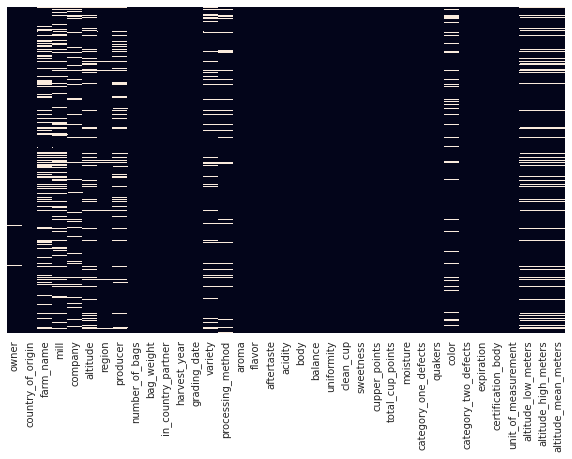

In [40]:
# Reviewing columns with the highest amount of missing values:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)

There are several columns that have a noticeable number of missing values. Most of them have to do with the location/owner of the bean. Additionally there are some columns (`variety`, `processing_method`, `color`) that we can fill in with some sort of 'no variety/processing/color specified' and continue with the analysis

## Farm/Owner/Mill Features

Let's begin by first reviewing all the columns that have something to do with the coffee bean farm/name/owner/company, region, etc.

In [41]:
df.head()

,owner,country_of_origin,farm_name,mill,company,altitude,region,producer,number_of_bags,bag_weight,...,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,...,0,0.0,Green,0,2016-04-03,METAD Agricultural Development plc,m,1950.0,2200.0,2075.0
1,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,...,0,0.0,Green,1,2016-04-03,METAD Agricultural Development plc,m,1950.0,2200.0,2075.0
3,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,wolensu,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,...,0,0.0,Green,2,2016-03-25,METAD Agricultural Development plc,m,1800.0,2200.0,2000.0
4,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,...,0,0.0,Green,2,2016-04-03,METAD Agricultural Development plc,m,1950.0,2200.0,2075.0
5,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,100,30 kg,...,0,0.0,Bluish-Green,1,2014-09-03,Specialty Coffee Institute of Asia,m,NaN,NaN,NaN


In [42]:
# A quick win we can do for the owner column is simply filling in the owner as 
# "No {var} Specified"
columns = ['owner', 'farm_name', 'mill', 'producer', 'company']

for col in columns:
  name = 'Farm Name' if col == 'farm_name' else col
  df[col] = df[col].fillna(f'No {name.capitalize()} Specified')

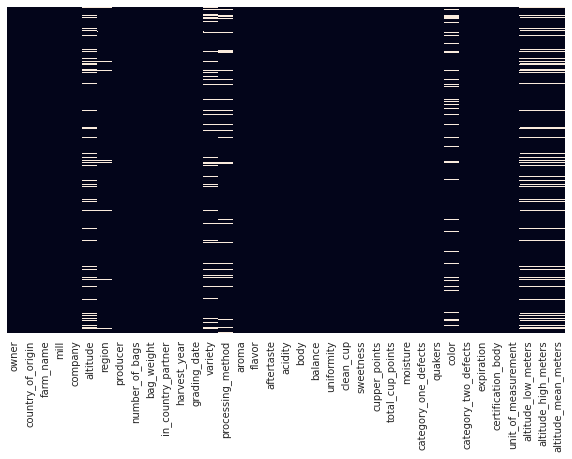

In [43]:
# Reviewing columns with the highest amount of missing values:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)

In [44]:
# Let's now take a look at the region column which has a few missing values:
df[df['region'].isna()]

,owner,country_of_origin,farm_name,mill,company,altitude,region,producer,number_of_bags,bag_weight,...,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
5,ji-ae ahn,Brazil,No Farm name Specified,No Mill Specified,No Company Specified,NaN,NaN,No Producer Specified,100,30 kg,...,0,0.0,Bluish-Green,1,2014-09-03,Specialty Coffee Institute of Asia,m,NaN,NaN,NaN
6,hugo valdivia,Peru,No Farm name Specified,hvc,richmond investment-coffee department,NaN,NaN,HVC,100,69 kg,...,0,0.0,Bluish-Green,0,2013-09-17,Specialty Coffee Institute of Asia,m,NaN,NaN,NaN
31,specialty coffee-korea,"Tanzania, United Republic Of",No Farm name Specified,No Mill Specified,No Company Specified,NaN,NaN,No Producer Specified,100,60 kg,...,0,0.0,Bluish-Green,1,2014-09-03,Specialty Coffee Institute of Asia,m,NaN,NaN,NaN
100,simon mahinda,Kenya,No Farm name Specified,ckcm,c dorman ltd,-1,NaN,No Producer Specified,170,60 kg,...,0,5.0,Green,7,2017-05-07,Kenya Coffee Traders Association,m,1.0,1.0,1.0
114,brian speckman,Kenya,No Farm name Specified,No Mill Specified,No Company Specified,NaN,NaN,No Producer Specified,320,60 kg,...,1,0.0,NaN,9,2011-08-26,Specialty Coffee Association,m,NaN,NaN,NaN
134,rob tuttle,Costa Rica,No Farm name Specified,No Mill Specified,thrive farmers,NaN,NaN,No Producer Specified,1,2 kg,...,1,0.0,Green,10,2015-01-03,Specialty Coffee Association,m,NaN,NaN,NaN
152,taylor winch (coffee) ltd.,Kenya,No Farm name Specified,No Mill Specified,taylor winch (coffee) ltd,NaN,NaN,changeru wet mill,11,660 kg,...,0,0.0,Green,0,2014-08-30,Kenya Coffee Traders Association,m,NaN,NaN,NaN
223,chris finch,Guatemala,No Farm name Specified,No Mill Specified,volcafe specialty coffee,NaN,NaN,No Producer Specified,275,5 lbs,...,0,0.0,Bluish-Green,0,2015-07-16,Specialty Coffee Association,m,NaN,NaN,NaN
240,amanda powers,Costa Rica,No Farm name Specified,"exclusive coffees s.a,",thrive farmers,NaN,NaN,No Producer Specified,275,150 lbs,...,1,2.0,None,13,2019-01-11,Specialty Coffee Association,m,NaN,NaN,NaN
257,doi tung development project,Thailand,doi tung development project,No Mill Specified,No Company Specified,NaN,NaN,No Producer Specified,1,60 kg,...,0,0.0,NaN,0,2012-08-15,Specialty Coffee Association,m,NaN,NaN,NaN


For the region we are in a similar scenario where we cannot know the region since there are no addresses to locate them. Thus, we'll apply a similar transformation to the farmers/mill/company.

In [45]:
df['region'] = df['region'].fillna('No Region Specified')

## Coffee Variety, Processing Method, Color
Now, let's review the `variety`, `processing_method` and `color`columns. I image we can apply similar transformations to the previous section, but let's first take a look at the data.

In [46]:
df['variety'].value_counts()

Caturra                  253
Bourbon                  224
Typica                   211
Other                    108
Catuai                    72
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                32
Catimor                   20
SL14                      17
SL28                      14
Pacas                     13
Gesha                     12
Pacamara                   8
SL34                       7
Arusha                     5
Mandheling                 3
Sumatra                    3
Blue Mountain              2
Ruiru 11                   2
Ethiopian Yirgacheffe      2
Java                       2
Peaberry                   1
Ethiopian Heirlooms        1
Moka Peaberry              1
Sulawesi                   1
Sumatra Lintong            1
Marigojipe                 1
Pache Comun                1
Name: variety, dtype: int64

In [47]:
# Since we have an Other column here, I think it'd be appropriate to simply put the NaN
# values in there as well
df['variety'] = df['variety'].fillna('Other')

In [48]:
# Now, let's review processing method
df['processing_method'].value_counts()

Washed / Wet                 808
Natural / Dry                250
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        12
Name: processing_method, dtype: int64

In [49]:
# Here, since we also have an other column, I'm inclined to drop the NaN values
# into there as well
df['processing_method'] = df['processing_method'].fillna('Other')

In [50]:
# Finally, let's review the color category
df['color'].value_counts()

Green           841
Bluish-Green    112
Blue-Green       80
None             51
Name: color, dtype: int64

For the `color`, there's one of two things we can do:

1. Assume the `NaN` have a color of `None`
2. Create a new category called `No Color Specified``

I am more inclined to go with the `None`column as I assume that if there were a color, it'd be filled it. So I'll go ahead and apply option 1.

In [51]:
df['color'] = df['color'].fillna('None')

## Coffee Altitude

This leaves us now with only one set of columns to review: the altitude columns. There are several things I'd like to consider when looking at these columns: 

1. Convert any feet altitudes to meters
2. For the missing values, do we find a range in the altitude column?
3. Do we really need all three columns?

In [52]:
# 1. Review the unit of measurements column:
df['unit_of_measurement'].value_counts()

m_nan = df[df['unit_of_measurement'] == 'm']['altitude_mean_meters'].isna().sum()
ft_nan = df[df['unit_of_measurement'] == 'ft']['altitude_mean_meters'].isna().sum()

print(f'Number of missing values in meters: {m_nan}')
print(f'Number of missing values in feet: {ft_nan}')

Number of missing values in meters: 138
Number of missing values in feet: 52


In [53]:
# 1b. Change the the name of the columns:
df = df.rename(columns={'unit_of_measurement': 'altitude_unit', 'altitude_mean_meters': 'mean_altitude_feet'})

Text(0.5, 0.98, 'Distribution of mean_altitude by measurement')

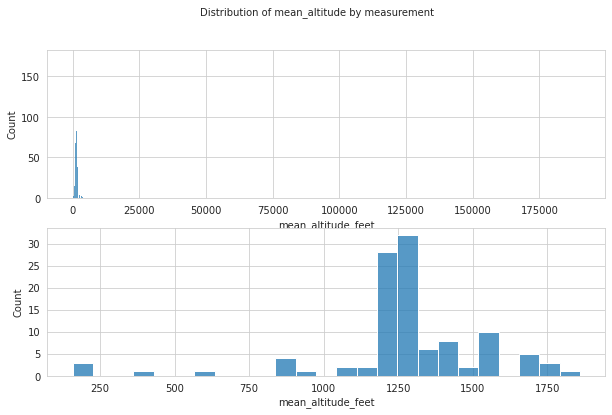

In [54]:
# 1c. Review the distribution of both feet and meter measurements
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

sns.histplot(df[df['altitude_unit'] == 'm']['mean_altitude_feet'], ax=ax[0])
sns.histplot(df[df['altitude_unit'] == 'ft']['mean_altitude_feet'], ax=ax[1])

fig.suptitle('Distribution of mean_altitude by measurement', fontsize=10)

In [55]:
# 1d. We have several outliers we need to adjust for. I believe these outlieres
# are wrongly scaled, so I am adjusting with the following func
def adjust_altitudes(x):
  if x > 10000: 
    return x / 1000
  elif x > 100000:
    return x / 10000
  else:
    return x

df['mean_altitude_feet'] = df['mean_altitude_feet'].apply(adjust_altitudes)

In [56]:
# 1e. Converting the feet to meters now that outliers are removed
df['mean_altitude_feet'] = df[['altitude_unit', 'mean_altitude_feet']].apply(lambda x: x[1] * 3.28084 if  x[0] == 'm' else x[1], axis=1)

Text(0.5, 0.98, 'Distribution of mean_altitude by measurement')

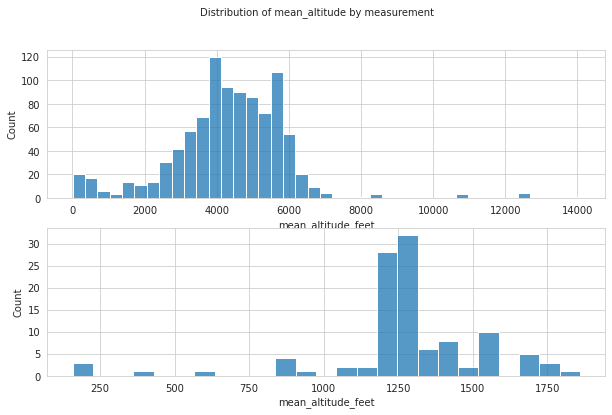

In [57]:
# 1f. Replotting and reviewing both measurements
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

sns.histplot(df[df['altitude_unit'] == 'm']['mean_altitude_feet'], ax=ax[0])
sns.histplot(df[df['altitude_unit'] == 'ft']['mean_altitude_feet'], ax=ax[1])

fig.suptitle('Distribution of mean_altitude by measurement', fontsize=10)

In [58]:
# 1g. We can drop the unit column since we have all altitudes measure in meters now
df = df.drop('altitude_unit', axis=1)

In [59]:
# 2. Now, let's look at how many values we are missing
df['mean_altitude_feet'].isna().sum()

190

In [60]:
# 2. Do we find a range in the altitude column?
mask_altitude = ~df['altitude'].isna()
mask_altitude_mean = df['mean_altitude_feet'].isna()
df[mask_altitude & mask_altitude_mean][['altitude', 'mean_altitude_feet']]

,altitude,mean_altitude_feet
687,huanuco,NaN
986,0,NaN


In [61]:
# 2b. From above, we see that the altitude column is really not useful, so let's go ahead and drop it
df = df.drop('altitude', axis=1)

In [62]:
# 2c. We'll group the regions by their altitude and then assign region average to the NaN values
def impute_altitudes_region(columns, grouped_altitudes):
  region = columns[0]
  altitude = columns[1]

  if pd.isna(altitude):
    return grouped_altitudes[region]
  else:
    return altitude

# Group the regions by altitude
altitude_groups = df.groupby('region').mean()['mean_altitude_feet'].to_dict()

# Apply the imputation
df['mean_altitude_feet'] = df[['region', 'mean_altitude_feet']]\
.apply(impute_altitudes_region, grouped_altitudes=altitude_groups, axis=1)

# Get the count of missing altitudes
df['mean_altitude_feet'].isna().sum()

21

In [63]:
# 2d. Since we still have missing values, let's do the same operation with countries
altitude_groups = df.groupby('country_of_origin').mean()['mean_altitude_feet'].to_dict()

# Apply the imputation
df['mean_altitude_feet'] = df[['country_of_origin', 'mean_altitude_feet']]\
.apply(impute_altitudes_region, grouped_altitudes=altitude_groups, axis=1)

# Get the count of missing altitudes
df['mean_altitude_feet'].isna().sum()

1

In [64]:
# 2e. We only have one missing row, which I'll drop:
df = df[~df['mean_altitude_feet'].isna()]

In [65]:
# 3. We can just go ahead and drop the other altitude columns since the range
# does not tell us much:
df = df.drop(['altitude_low_meters', 'altitude_high_meters'], axis=1)
print(f'There are now {df.shape[0]} records in the datafile.')

There are now 1253 records in the datafile.


With that, we have no remaining `NaN` values! 😊

## Coffee Bag Weights

There is one more column to look at which requires cleaning and that is the coffee bag weights. Since we have both `lbs` and `kgs`in this category, we have to clean this column in a similar fashion to that of the `mean_altitude` column.

In [66]:
df[['weight', 'unit']] = df['bag_weight'].str.split(expand=True)

In [67]:
# Most records parse the weight measurement as expect
# Let's look at the cases that are not labeled as expected
valid_units = ['kg','lbs']
df[~df['unit'].isin(valid_units)]

,owner,country_of_origin,farm_name,mill,company,region,producer,number_of_bags,bag_weight,in_country_partner,...,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,mean_altitude_feet,weight,unit
13,grounds for health admin,United States (Hawaii),arianna farms,No Mill Specified,No Company Specified,kona,"Robert, Sharon, Arianna Wood",1,1,Specialty Coffee Association,...,0.00,0,0.0,None,2,2011-05-31,Specialty Coffee Association,609.600000,1,None
17,ethiopia commodity exchange,Ethiopia,No Farm name Specified,No Mill Specified,No Company Specified,yirgacheffe,Green Gold Ethiopia | Phone: 0114342032,150,6,Ethiopia Commodity Exchange,...,0.05,0,0.0,None,2,2011-06-16,Ethiopia Commodity Exchange,6151.575000,6,None
26,ethiopia commodity exchange,Ethiopia,No Farm name Specified,No Mill Specified,No Company Specified,sidamo,Green Gold Ethiopia | Phone: 0114342032,150,6,Ethiopia Commodity Exchange,...,0.05,0,0.0,None,2,2011-06-16,Ethiopia Commodity Exchange,5659.449000,6,None
38,ethiopia commodity exchange,Ethiopia,"phone number | 0911-51-08-01, email | at",No Mill Specified,No Company Specified,yirgacheffe,Contact name | ATO Teshome Belamo,300,6,Ethiopia Commodity Exchange,...,0.10,0,0.0,None,2,2011-06-17,Ethiopia Commodity Exchange,6151.575000,6,None
50,ethiopia commodity exchange,Ethiopia,contact | sidacoop@ethionet.net,coffee processing and warehouse enterpri,No Company Specified,sidamo,Sidama Coffee Farmers Coop. Union,300,6,Ethiopia Commodity Exchange,...,0.01,0,0.0,None,4,2011-06-17,Ethiopia Commodity Exchange,5741.470000,6,None
51,grounds for health admin,United States (Hawaii),hula daddy kona coffee,No Mill Specified,No Company Specified,kona,Hula Daddy Kona Coffee,1,2,Specialty Coffee Association,...,0.00,0,0.0,None,0,2011-05-31,Specialty Coffee Association,426.720000,2,None
74,grounds for health admin,El Salvador,sierra nevada,beneficio las tres puertas,No Company Specified,apaneca,J. Hill y Cia SA de CV,2,"1 kg,lbs",Specialty Coffee Association,...,0.01,0,0.0,None,0,2011-05-31,Specialty Coffee Association,4593.176000,1,"kg,lbs"
82,ethiopia commodity exchange,Ethiopia,No Farm name Specified,No Mill Specified,No Company Specified,yirgacheffe,Contact name | Hailu Gebre Hiwot,300,6,Ethiopia Commodity Exchange,...,0.10,0,0.0,None,3,2011-06-17,Ethiopia Commodity Exchange,6151.575000,6,None
94,ethiopia commodity exchange,Ethiopia,No Farm name Specified,No Mill Specified,No Company Specified,sidamo,Exporter Name | Muluneh Kaka | Phone: 0114390290,360,6,Ethiopia Commodity Exchange,...,0.00,0,0.0,None,5,2011-06-17,Ethiopia Commodity Exchange,5659.449000,6,None
118,ethiopia commodity exchange,Ethiopia,contact | sidacoop@ethionet.net,coffee processing and warehouse enterpri,No Company Specified,sidamo,Sidama Coffee Farmers Coop. Union,300,6,Ethiopia Commodity Exchange,...,0.10,0,0.0,None,2,2011-06-17,Ethiopia Commodity Exchange,5741.470000,6,None


In [68]:
# To address these records, let's look at the most common unit of measurement 
# for each country
pd.crosstab(df['country_of_origin'],df['unit'])

unit,kg,"kg,lbs",lbs
country_of_origin,,,
Brazil,125,0,2
Burundi,2,0,0
China,16,0,0
Colombia,168,0,5
Costa Rica,40,0,9
Cote d?Ivoire,1,0,0
Ecuador,0,0,1
El Salvador,20,1,0
Ethiopia,30,0,0


In [69]:
# Convert kg to lbs - our audience is more familiar with lbs
# We'll assume that if 'unit' is missing the measurement should be kg
# If 'unit' is missing AND country is 'United States (Hawaii)', assume lbs

df['weight'] = df['weight'].astype(int)

def convert_weights(columns):
  weight = columns[0]
  unit = columns[1]
  country = columns[2]

  if unit == 'lbs':
    return weight
  elif unit == 'kg' or unit == 'kg,lbs':
    return weight * 2.20462
  elif country == 'United States (Hawaii)':
    return weight
  else: 
    return weight * 2.20462

# Apply the imputation
df['bag_weight_lbs'] = df[['weight', 'unit','country_of_origin']].apply(convert_weights, axis=1)


In [70]:
# Once 'bag_weight_lbs' is calculated, we can remove 'unit' and 'weight'
df = df.drop(['unit', 'weight'], axis=1)

After conversion, it does seem that there are a few massive outliers in the weight column.

I think it might make sense to remove these few records, but let me know what everyone thinks. Could remove any weight values greater than 10k.

These few records would have a huge influence if included as is.

Also note there is a record with a weight of 0. This isn't as harmful to some of the analysis we might run, but maybe it's worth removing as well?

Summary of bag weight in pounds:


count     1253.000000
mean       415.597150
std       3471.550785
min          0.000000
25%          2.204620
50%        101.412520
75%        152.118780
max      42328.704000
Name: bag_weight_lbs, dtype: float64

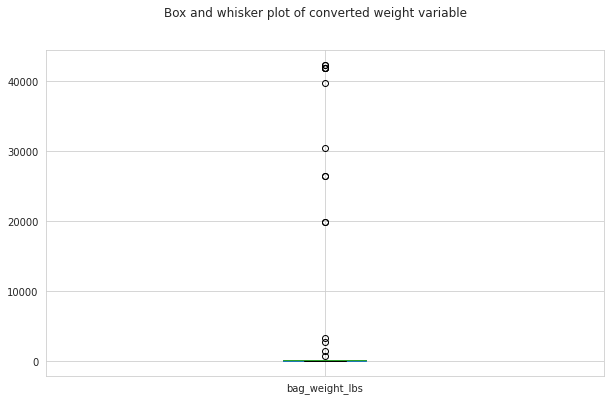

In [71]:
# Explore outliers

fig,ax = plt.subplots(1, 1, figsize=(10, 6))
df.boxplot(column =['bag_weight_lbs'])
fig.suptitle('Box and whisker plot of converted weight variable')

print("Summary of bag weight in pounds:")
df['bag_weight_lbs'].describe()

In [72]:
# Check if number of bags can help explain the outliers at all

df[df['bag_weight_lbs']>10000][['bag_weight_lbs','number_of_bags']]

# If these figures are correct, bags would have to be over 100 pounds.
# We will consider these to be erroneous and remove them from the dataset.

df = df[df['bag_weight_lbs']<10000]
print(f'There are now {df.shape[0]} records in the datafile.')

There are now 1241 records in the datafile.


## Recode country names

We are going to rename some countries in the `country_of_origin` variable. This will help during the analysis phase.


In [73]:
df.loc[df.country_of_origin == 'Tanzania, United Republic Of', 'country_of_origin'] = 'Tanzania'
df.loc[df.country_of_origin == 'United States (Hawaii)', 'country_of_origin'] = 'United States of America'
df.loc[df.country_of_origin == 'United States (Puerto Rico)', 'country_of_origin'] = 'United States of America'
df.loc[df.country_of_origin == 'United States', 'country_of_origin'] = 'United States of America'
df.loc[df.country_of_origin == 'Cote d?Ivoire', 'country_of_origin'] = "Cote d'Ivoire"

df['country_of_origin'].value_counts()

Mexico                      235
Guatemala                   177
Colombia                    173
Brazil                      127
Taiwan                       75
United States of America     66
Honduras                     52
Costa Rica                   46
Tanzania                     40
Ethiopia                     40
Thailand                     27
Uganda                       24
Nicaragua                    23
El Salvador                  21
Kenya                        20
Indonesia                    19
China                        16
Malawi                       11
Peru                          8
Myanmar                       8
Vietnam                       7
Haiti                         6
Philippines                   5
Panama                        4
Laos                          3
Burundi                       2
Zambia                        1
Mauritius                     1
Papua New Guinea              1
Rwanda                        1
Ecuador                       1
Cote d'I

## Recode 'coffee points' variables
Evaluate the coffee points attributes and check for any oddities in the data

In [74]:
# While all coffe has complete data for ratings, there are some scores of zero
# The 25 percentile for all tasting notes is above 7.0
df.iloc[:,14:25].describe()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,7.562313,7.514843,7.391652,7.530959,7.512788,7.509404,9.836503,9.830709,9.905359,7.489073,82.083876
std,0.382688,0.403923,0.408145,0.384926,0.361249,0.408728,0.566566,0.789442,0.535179,0.478088,3.576249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000
50%,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000


Text(0.5, 0.98, 'Box and whisker plot of total cup points')

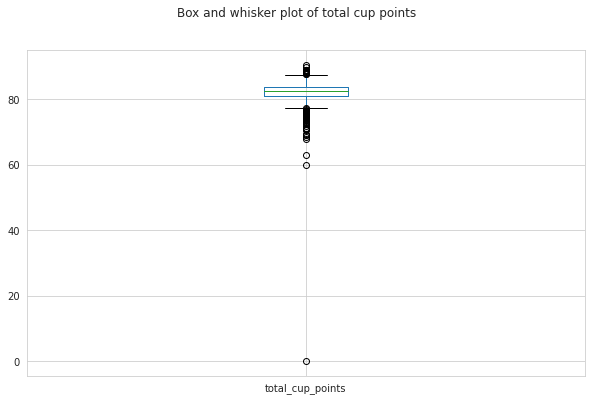

In [75]:
# It looks like there are some particularly low scores for coffee (namely scores of zero) that we will remove from analysis.
fig,ax = plt.subplots(1, 1, figsize=(10, 6))
df.boxplot(column = ['total_cup_points'])
fig.suptitle('Box and whisker plot of total cup points')

In [76]:
# We assume scores less than 50 are erroneous and will remove them from the dataset
# This removes 2 records

df = df[df.total_cup_points >= 50]

## Finalized Clean Dataset for Exploration

Now that we have narrowed down the dataset to only the necessary, validated variables, let's take a quick look at the size and properties of our finalized datast.

In [78]:
# Remaning number of rows and columns in the dataset
print("Rows remaining:", len(df), "\nColumns remaining:", len(df.columns))

Rows remaining: 1240 
Columns remaining: 34


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240 entries, 0 to 1309
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   owner                 1240 non-null   object        
 1   country_of_origin     1240 non-null   object        
 2   farm_name             1240 non-null   object        
 3   mill                  1240 non-null   object        
 4   company               1240 non-null   object        
 5   region                1240 non-null   object        
 6   producer              1240 non-null   object        
 7   number_of_bags        1240 non-null   int64         
 8   bag_weight            1240 non-null   object        
 9   in_country_partner    1240 non-null   object        
 10  harvest_year          1240 non-null   int64         
 11  grading_date          1240 non-null   datetime64[ns]
 12  variety               1240 non-null   object        
 13  processing_method 

In [80]:
df.head(10)

,owner,country_of_origin,farm_name,mill,company,region,producer,number_of_bags,bag_weight,in_country_partner,...,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,mean_altitude_feet,bag_weight_lbs
0,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,...,90.58,0.12,0,0.0,Green,0,2016-04-03,METAD Agricultural Development plc,6807.743000,132.27720
1,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,...,89.92,0.12,0,0.0,Green,1,2016-04-03,METAD Agricultural Development plc,6807.743000,132.27720
3,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,wolensu,yidnekachew debessa coffee plantation,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,...,89.00,0.11,0,0.0,Green,2,2016-03-25,METAD Agricultural Development plc,6561.680000,132.27720
4,metad plc,Ethiopia,metad plc,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,...,88.83,0.12,0,0.0,Green,2,2016-04-03,METAD Agricultural Development plc,6807.743000,132.27720
5,ji-ae ahn,Brazil,No Farm name Specified,No Mill Specified,No Company Specified,No Region Specified,No Producer Specified,100,30 kg,Specialty Coffee Institute of Asia,...,88.83,0.11,0,0.0,Bluish-Green,1,2014-09-03,Specialty Coffee Institute of Asia,2407.042947,66.13860
6,hugo valdivia,Peru,No Farm name Specified,hvc,richmond investment-coffee department,No Region Specified,HVC,100,69 kg,Specialty Coffee Institute of Asia,...,88.75,0.11,0,0.0,Bluish-Green,0,2013-09-17,Specialty Coffee Institute of Asia,2407.042947,152.11878
7,ethiopia commodity exchange,Ethiopia,aolme,c.p.w.e,No Company Specified,oromia,Bazen Agricultural & Industrial Dev't Plc,300,60 kg,Ethiopia Commodity Exchange,...,88.67,0.03,0,0.0,None,0,2011-09-02,Ethiopia Commodity Exchange,5364.173400,132.27720
8,ethiopia commodity exchange,Ethiopia,aolme,c.p.w.e,No Company Specified,oromiya,Bazen Agricultural & Industrial Dev't Plc,300,60 kg,Ethiopia Commodity Exchange,...,88.42,0.03,0,0.0,None,0,2011-09-02,Ethiopia Commodity Exchange,5364.173400,132.27720
9,diamond enterprise plc,Ethiopia,tulla coffee farm,tulla coffee farm,diamond enterprise plc,"snnp/kaffa zone,gimbowereda",Diamond Enterprise Plc,50,60 kg,METAD Agricultural Development plc,...,88.25,0.10,0,0.0,Green,4,2016-03-29,METAD Agricultural Development plc,5979.330900,132.27720
10,mohammed lalo,Ethiopia,fahem coffee plantation,No Mill Specified,fahem coffee plantation,oromia,Fahem Coffee Plantation,300,60 kg,METAD Agricultural Development plc,...,88.08,0.10,0,0.0,None,1,2016-03-26,METAD Agricultural Development plc,6250.000200,132.27720


In [81]:
# Outputting our cleaned data
df.to_csv('arabica_coffee_cleaned.csv')